空洞卷积(dilated conv, atrous conv)最早是为了解决分割问题而提出的，后来在检测领域也有所应用。其主要作用是在不降低特征图尺寸的前提下增加感受野，以小卷积核的参数量达到大卷积核的感受野。

在检测或分割任务中，通常先对特征图进行下采样，然后再上采样（如FPN），但这样在下采样时通常会损失信息，而用空洞卷积就不用下采样，可以提升小目标的精度（降低特征图尺寸对小目标检测不利）

空洞卷积的示意图如下，空洞卷积含有一个参数dilation rate，及扩张率，如下图（b）扩张率为2，(c)扩张率为3.
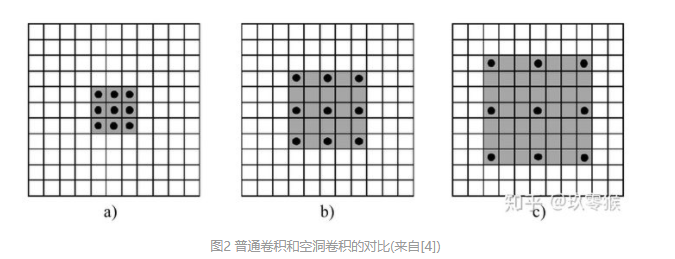

多尺度信息：在每一层用3x3卷积，在不用层用不同的扩张率，即可得到多尺度信息。

感受野（感受野是特征图的尺寸映射到输入图像的区域尺寸）计算：<br/>
$k为卷积核尺寸，k'为卷积核等效尺寸，d为扩张率，则：$<br/>
$k' = k + (k-1)*(d-1)$<br/>
$如上图(b)，k=3,d=2,则其等效卷积核尺寸k'=3+(3-1)*(2-1)=5$<br/>
$RF_{i+1}为当前特征图感受野，RF_{i}为上一层特征图感受野，则：$<br/>
$RF_{i+1} = RF_i + (k'-1)*S_i$<br/>
$其中，S_i为之前所有层步长(stride)的乘积，S_i = \prod_{j=1}^{i}{stride_j}$<br/>
感受野计算实例如下：
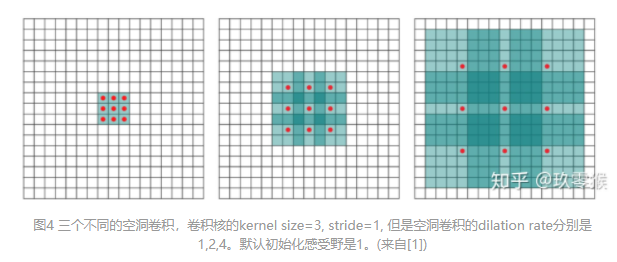

潜在的问题：空洞卷积采用稀疏采样的方式，可能造成局部信息丢失。

空洞卷积的实现：<br/>
conv1 = nn.Conv2d(1, 1, 3, stride=1, bias=False, dilation=1)  # 普通卷积<br/>
conv2 = nn.Conv2d(1, 1, 3, stride=1, bias=False, dilation=2)  # dilation就是空洞率，即间隔